
<div style="border:1px solid black; padding:20px 20px;text-align: justify;text-justify: inter-word">
    <strong>Exercise Session 2 - Computer vision: 4 hours (2 in session + 2 at home)</strong><br/><br/>
    <span style="text-decoration:underline;font-weight:bold;">How to use this notebook?</span><br/>
    This notebook is made of text cells and code cells. The code cells have to be <strong>executed</strong> to see the result of the program. To execute a cell, simply select it and click on the "play" button (<span style="font: bold 12px/30px Arial, serif;">&#9658;</span>) in the tool bar just above the notebook, or type <code>shift + enter</code>. It is important to execute the code cells in their order of appearance in the notebook.<br/>
You can make use of the table of contents to navigate easily between sections.
</div>

<br/>

<div style="justify;text-justify: inter-word">
So that you may familiarise with the notebooks and the basic python syntax, the exercises are provided in notebook form and whenever there are any calculations to be made, we encourage you to do them by code. Also, if you want to take notes, we encourage you to use the markdown or Raw NBConvert cells. 
</div>

Note : the images used in this exercise session were taken from tutorials online. And although the references are not provided here so that you don't have a sneak peak at the solution, you will not be excused if you do not cite your sources in the project. 

</span></li><li><span><a href="<span><a #Activity-1---Implementing-the-Hough-Transform-to-Identify-Straight-Lines-in-an-Image" data-toc-modified-id="Activity-1---Implementing-the-Hough-Transform-to-Identify-Straight-Lines-in-an-Image-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Activity 1 - Implementing the Hough Transform to Identify Straight Lines in an Image</a></span><ul class="toc-item"><li><span><a href="#Importing-the-libraries" data-toc-modified-id="Importing-the-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing the libraries</a></span></li><li><span><a href="#Loading-and-displaying-the-image" data-toc-modified-id="Loading-and-displaying-the-image-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Loading and displaying the image</a></span></li><li><span><a href="#Creating-the-hough-transform-matrix" data-toc-modified-id="Creating-the-hough-transform-matrix-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Creating the hough transform matrix</a></span></li><li><span><a href="#Identifying-the-maxima-of-the-Hough-Transform" data-toc-modified-id="Identifying-the-maxima-of-the-Hough-Transform-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Identifying the maxima of the Hough Transform</a></span><ul class="toc-item"><li><span><a href="#Isolating-the-brightest-spots-through-thresholding" data-toc-modified-id="Isolating-the-brightest-spots-through-thresholding-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Isolating the brightest spots through thresholding</a></span></li><li><span><a href="#Enlarging-the-size-of-the-spots-through-morphological-operators" data-toc-modified-id="Enlarging-the-size-of-the-spots-through-morphological-operators-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Enlarging the size of the spots through morphological operators</a></span></li><li><span><a href="#Identifying-the-Centroids'-Locations-Through-Contours" data-toc-modified-id="Identifying-the-Centroids'-Locations-Through-Contours-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Identifying the Centroids' Locations Through Contours</a></span></li></ul></li><li><span><a href="#Computing-the-location-of-the-straight-lines-in-the-original-image-and-drawing-them" data-toc-modified-id="Computing-the-location-of-the-straight-lines-in-the-original-image-and-drawing-them-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Computing the location of the straight lines in the original image and drawing them</a></span></li></ul></li></ul></div>

# Implementing the Hough Transform to Identify Straight Lines in an Image


## Learning Goals

The goal of this exercise is going to be to code the Hough transform to identify straight lines in an image. We are going to use the following image throughout the exercise in order to test the different steps. The image is located in the Images folder under ``pentagon.png``

As this is one of your first "big" coding exercises we are going to guide you through it. 

<br/>

![Pentagon](Images/pentagon.png)

<br/>

## Importing the libraries 

We are going to need the :

- `opencv` for image processing (software library that provides a comprehensive set of tools for computer vision tasks. It's widely used in applications ranging from real-time video processing to advanced robotics.)

- `math` for the trigonometry functions

- `numpy` for array processing

- `matplotlib` for plotting

> Note that the exercise was inspired from the example [here](https://www.science-emergence.com/Articles/Implementing-a-simple-python-code-to-detect-straight-lines-using-Hough-transform/)

In [11]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt 

## Loading and displaying the image

Start by giving the filename with the full path so that the mpimg module can load the image with the imread function. 

Then display the image object with plt.imshow()

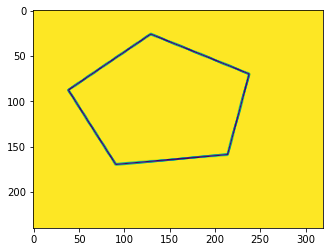

In [12]:

filename = 'images/pentagon.png'
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

## Creating the hough transform matrix

1. We start by creating a numpy array of arbitrary dimensions. 

In [13]:
# We choose to have a final matrix of the following
# dimensions. This is an arbitrary decision

r_dim = 200 
theta_dim = 300

# Creating the empty hough transform matrix
hough_space = np.zeros((r_dim,theta_dim))

**Mapping to Discrete Hough Space:**

<span style="color: #2980B9 ;">

Since computers can't handle continuous ranges effectively, we discretize the range of possible \(r\) and \(\theta\) values into a finite number of bins:

- `theta_dim` is the number of bins for \(\theta\)
- `r_dim` is the number of bins for \(r\)

2. Now we need to relate the dimensions of this new matrix to the corresponding values along the rho and theta axes. This means we need to determine the minimum and maximum values of theta and rho. 

In [14]:
# Get theta min and theta max
theta_max = 1.0 * math.pi 
theta_min = 0.0

# From the image shape, determine rho min and rho max
(x_max, y_max) = img.shape
r_min = 0.0
r_max = math.hypot(x_max, y_max)


Now we are going to compute the hough transform of the original image. The pseudo code is the following :

    for all pixels:
        if the pixel is white:
              do nothing
        else:
            for theta values :
                compute rho from the pixel coordinates and theta
                normalise rho 
                update the hough space matrix for the theta and rho coordinates in the array 
                
                
You should get a result similar to this one 


<br/>

![Pentagon](Images/houghTransform.png)


<span style="color: #2980B9 ;">

**Understanding the Hough Transform:**

The Hough Transform is a feature extraction technique used in image analysis, computer vision, and digital image processing. Its purpose is to find imperfect instances of objects within a certain class of shapes by a voting procedure.

For detecting lines, the standard Hough Transform involves mapping points from the Cartesian coordinate system (image space) to the polar coordinate system (Hough space). Each point (x, y) in the image space corresponds to a sinusoidal curve in the Hough space defined by the formula:

\[
$r = x \cdot \cos(\theta) + y \cdot \sin(\theta)$
\]


1. **Scaling $\rho$ to the Hough Space Index:**

   - The computed $r$ value from the equation $r = x \cdot \cos(\theta) + y \cdot \sin(\theta)$ can range from $-r_{\text{max}}$ to $r_{\text{max}}$.
   - However, array indices must be non-negative integers.
   - To map $r$ to a valid index (`ir`) in the Hough space array (`hough_space`), we scale and shift $r$ accordingly.

2. **The Actual Mapping:**

   ```python
   ir = int(r_dim * (r + r_max) / (2 * r_max))
   ```

   - **Shift $r$ to have Non-negative index:**
     - Adding `r_max` shifts the range from $([-r_{\text{max}}, r_{\text{max}}]$ to $[0, 2r_{\text{max}}]$.
   - **Scale to Index Range:**
     - Multiplying by `r_dim / (2 * r_max)` scales the shifted $r$ value to the range [0, r_dim], which corresponds to valid indices in the Hough space array.

By applying this mapping, we ensure that all r values correspond to valid indices in the Hough space array. This avoids negative indices and ensures that the plotting in NumPy correctly represents the Hough transform.

Text(0.5, 1.0, 'Hough Space')

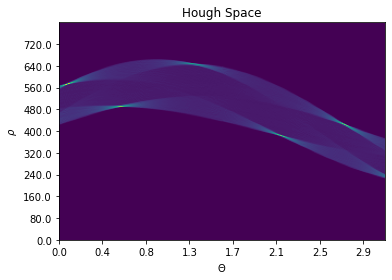

In [15]:

for x in range(x_max):
    for y in range(y_max):
        if img[x,y] == 255: continue # if  pixel = white continue
        for idx_theta in range(theta_dim): 
            theta = 1.0 * idx_theta * theta_max / theta_dim 
            r = x * math.cos(theta) + y * math.sin(theta) # calculate rho
            ir = int(r_dim * (r + r_max) / (2 * r_max)) # calculate the index of rho

            hough_space[int(ir),int(idx_theta)] += 1
            
# Plotting function
plt.imshow(hough_space, origin='lower')

#################### We add values and labels to the axes################
plt.xlim(0,theta_dim)
plt.ylim(0,r_dim)

tick_locs = [i for i in range(0,theta_dim,40)]
tick_lbls = [round( (1.0 * i * theta_max) / theta_dim,1) for i in range(0,theta_dim,40)]
plt.xticks(tick_locs, tick_lbls)

tick_locs = [i for i in range(0,r_dim,20)]
tick_lbls = [round( (1.0 * i * 2*r_max ) / r_dim,1) for i in range(0,r_dim,20)]
plt.yticks(tick_locs, tick_lbls)

plt.xlabel(r'$\Theta$')
plt.ylabel(r'$\rho$')
plt.title('Hough Space')

## Identifying the maxima of the Hough Transform

After calculating the Hough space, the next step is to find the local extrema. This will give us the rho and theta parameters of the different straight lines in the image. 

To find the extrema, we will do the following :

1. isolate the brightest spots

2. enlarge the size of the spots

3. find the centroid of the spots

### Isolating the brightest spots through thresholding

To isolate the bright spots and remove the gradients around the maxima we are going to apply **thresholding** to convert the image into 0's for the dark areas and 1's around the maximas. Have a look [here](https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html) at the different thresholding functions that opencv has to offer. 

Play with the parameters to try to obtain an image similar to this one 



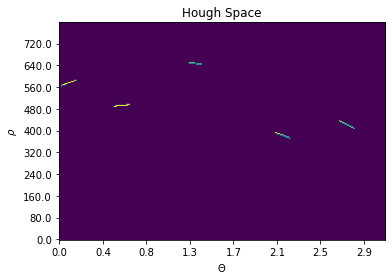

In [16]:
# First we convert the pixels to uint8 in order to apply the thresholding
converted_hough_space = cv2.convertScaleAbs(hough_space)
_, thresholded_hough_space = cv2.threshold(converted_hough_space,180,255,cv2.THRESH_BINARY)
plt.imshow(thresholded_hough_space, origin='lower')


tick_locs = [i for i in range(0,theta_dim,40)]
tick_lbls = [round( (1.0 * i * theta_max) / theta_dim,1) for i in range(0,theta_dim,40)]
plt.xticks(tick_locs, tick_lbls)

tick_locs = [i for i in range(0,r_dim,20)]
tick_lbls = [round( (1.0 * i * 2*r_max ) / r_dim,1) for i in range(0,r_dim,20)]
plt.yticks(tick_locs, tick_lbls)

plt.xlabel(r'$\Theta$')
plt.ylabel(r'$\rho$')
plt.title('Hough Space')

plt.savefig("./images/thresholding_output.png")
plt.savefig("./images/thresholding_output.png")

plt.show()

### Enlarging the size of the spots through morphological operators

To identify the location of the local maxima, we will make use of find contours. However the spots in the image are too small to apply the opencv functions. That is why we are going to start by increasing their size through morphological operations. Have a look [here](https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html) to see the different operators and their effect on a binary image. 


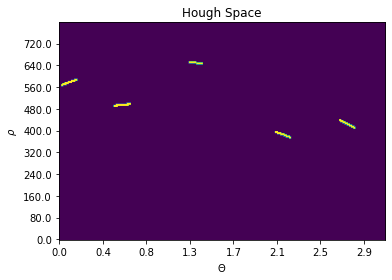

In [17]:
kernel = np.ones((2,2),np.uint8)
hough_maxima = cv2.dilate(thresholded_hough_space, kernel, iterations = 1)
plt.imshow(hough_maxima, origin='lower')


tick_locs = [i for i in range(0,theta_dim,40)]
tick_lbls = [round( (1.0 * i * theta_max) / theta_dim,1) for i in range(0,theta_dim,40)]
plt.xticks(tick_locs, tick_lbls)

tick_locs = [i for i in range(0,r_dim,20)]
tick_lbls = [round( (1.0 * i * 2*r_max ) / r_dim,1) for i in range(0,r_dim,20)]
plt.yticks(tick_locs, tick_lbls)

plt.xlabel(r'$\Theta$')
plt.ylabel(r'$\rho$')
plt.title('Hough Space')

plt.savefig("./images/morphological_output.png")


### Identifying the Centroids' Locations Through Contours 

Now we have bigger spots and we are going to use Opencv's built in functions to find the contours and deduce the location of the centroid in the hough space. [An example is provided here](https://www.learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/). 



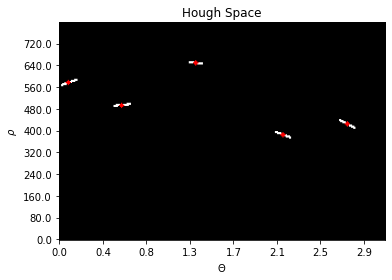

In [18]:
# find contours in the binary image
output = hough_maxima.copy()
contours, hierarchy = cv2.findContours(hough_maxima,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

#Converting to color for the visualisation
output = cv2.cvtColor(output,cv2.COLOR_GRAY2RGB) 

maxima_locs = []

for c in contours:
    # calculate moments for each contour
    M = cv2.moments(c)

    # calculate x, y coordinate of center
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    
    maxima_locs.append((cX, cY))
    cv2.circle(output, (cX, cY), 2, (255, 0, 0), -1)
    
# display the image
plt.imshow(output, origin="lower")


tick_locs = [i for i in range(0,theta_dim,40)]
tick_lbls = [round( (1.0 * i * theta_max) / theta_dim,1) for i in range(0,theta_dim,40)]
plt.xticks(tick_locs, tick_lbls)

tick_locs = [i for i in range(0,r_dim,20)]
tick_lbls = [round( (1.0 * i * 2*r_max ) / r_dim,1) for i in range(0,r_dim,20)]
plt.yticks(tick_locs, tick_lbls)

plt.xlabel(r'$\Theta$')
plt.ylabel(r'$\rho$')
plt.title('Hough Space')

plt.savefig("./images/centroid_output.png")


## Computing the location of the straight lines in the original image and drawing them

With the maxima obtained, we can now compute the corresponding segments in the original image. You should get a result similar to this one. 


<br/>

![Pentagon](images/hough_transform.png)

<br/>


<span style="color: #2980B9 ;">
Here is a graphical method for deriving the same equations. 

![draw a line](images/draw_a_line.jpeg)<br>
    
Keep in mind that 'i' represents a parameter used to iterate along the line, not the y-coordinate.

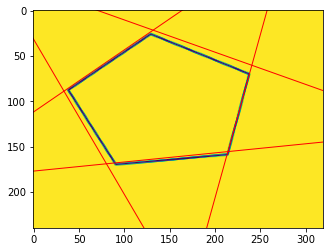

In [19]:
fig, ax = plt.subplots()
ax.imshow(img)
ax.autoscale(False)
for (j,i) in maxima_locs:

    # the r index is calculated as: ir = int(r_dim * (r + r_max) / (2 * r_max)) # calculate the index of rho
 
    # so we can calculate r as: r = round((2* r_max/ r_dim) * (i-r_dim/2))

    r= round((2* r_max/ r_dim) * (i - r_dim/2))


    theta = round( (1.0 * j * theta_max) / theta_dim,1)
    px = []
    py = []
    
    for i in range(-y_max-40,y_max+40,1):
        px.append( math.cos(-theta) * i - math.sin(-theta) * r ) 
        py.append( math.sin(-theta) * i + math.cos(-theta) * r )

    ax.plot(px,py, linewidth=1, color="r")

plt.savefig("./images/hough_transform.png")

plt.show()

# Quiz Corrections
See the attached file: **quiz_correction.pdf** (in the same folder).